This is the final assignment of the Data Visualization course at the University of Michigan.

If you live in Berlin, you wait for the summer to come all year, and when it never really arrives, you feel like you want your money back.

2017 was exceptionally bad in that respect, it was cold and rained a lot.
But how much did the temperature in summer 2017 actually differ from the average, expected summer temperature?
Was it as bad as I subjectively felt?

In [70]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import requests
from selenium.webdriver.support.ui import Select
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
url_base = "https://www.timeanddate.de/wetter/deutschland/berlin/rueckblick?month={}&year=2017"

In [26]:
data = {}
for month in range(1, 13):
    print( "month ", str(month))
    driver = webdriver.Firefox()
    driver.get(url_base.format(str(month)))
    dropdown = driver.find_element_by_id("wt-his-select")
    soup = BeautifulSoup(driver.page_source, "lxml")
    options = soup.find("select", {"id" : "wt-his-select"}).findAll("option")
    options = [re.findall("value=\"([0-9]+)\"", str(x))[0] for x in  options]

    for date in options:
        #print(date)
        select = Select(driver.find_element_by_id('wt-his-select'))
        select.select_by_value(date)
        time.sleep(6)
        soup = BeautifulSoup(driver.page_source, "lxml")
        #I want to find the daytime temperature, but the hour varies
        hour = soup.find("th", text=re.compile("14:[0-9+]"))
        temp = hour.find_next_sibling("td", text=re.compile("°")).text
        data[date] = [temp]       

month  1
month  2
month  3
month  4
month  5
month  6
month  7
month  8
month  9
month  10
month  11
month  12


In [76]:
df = pd.DataFrame(data).T

In [29]:
df.to_pickle("scraper_output_daily_temps.pkl")

In [77]:
df.head(10)

,0
20170101,4 °C
20170102,3 °C
20170103,3 °C
20170104,2 °C
20170105,-2 °C
20170106,-3 °C
20170107,-5 °C
20170108,-2 °C
20170109,0 °C
20170110,1 °C


In [79]:
#Converting string to int
df.columns = ['temp']
df['temp_clean'] = df.temp.str.findall("(.+)\s°C").apply(lambda x: int(x[0]))
df.index = list(map(pd.to_datetime, df.index))

<IPython.core.display.Javascript object>


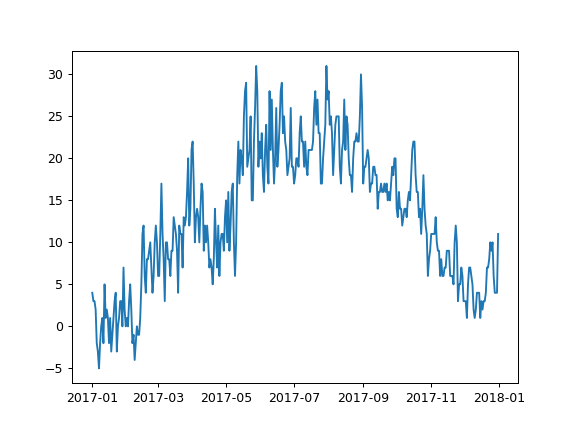

In [107]:
plt.figure()
plt.plot(df.index, df['temp_clean'], "-")
# Okay we are getting somewhere

In [150]:
#Lets calculate the averages per month to compare it with climate averages per month later on
hist_mean = df.groupby(list(map(lambda x: ( x.month), df.index))).mean()

In [151]:
hist_mean

,temp_clean
1,0.774194
2,4.392857
3,10.741935
4,11.233333
5,18.774194
6,21.700000
7,21.903226
8,22.516129
9,17.500000
10,14.387097


In [85]:
# Let's now pull the climate average monthy daytime temperatures from wikipedia
r = requests.get("https://en.wikipedia.org/wiki/Berlin#Climate")
soup = BeautifulSoup(r.text, "lxml")
table = soup.findAll("table", {"class" : "wikitable collapsible"})[0]

wiki = pd.read_html(str(table), skiprows=1, index_col=0)[0]
wiki

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Record high °C (°F),15.5 (59.9),18.7 (65.7),24.8 (76.6),31.3 (88.3),35.5 (95.9),35.9 (96.6),38.1 (100.6),38.0 (100.4),34.2 (93.6),28.1 (82.6),20.5 (68.9),16.0 (60.8),38.1 (100.6)
Average high °C (°F),3.3 (37.9),5.0 (41),9.0 (48.2),15.0 (59),19.6 (67.3),22.3 (72.1),25.0 (77),24.5 (76.1),19.3 (66.7),13.9 (57),7.7 (45.9),3.7 (38.7),14.02 (57.24)
Daily mean °C (°F),0.6 (33.1),1.4 (34.5),4.8 (40.6),8.9 (48),14.3 (57.7),17.1 (62.8),19.2 (66.6),18.9 (66),14.5 (58.1),9.7 (49.5),4.7 (40.5),2.0 (35.6),9.67 (49.42)
Average low °C (°F),−1.9 (28.6),−1.5 (29.3),1.3 (34.3),4.2 (39.6),9.0 (48.2),12.3 (54.1),14.3 (57.7),14.1 (57.4),10.6 (51.1),6.4 (43.5),2.2 (36),−0.4 (31.3),5.88 (42.59)
Record low °C (°F),−23.1 (−9.6),−26.0 (−14.8),−16.5 (2.3),−8.1 (17.4),−4.0 (24.8),1.5 (34.7),5.4 (41.7),3.5 (38.3),−1.5 (29.3),−9.6 (14.7),−16.0 (3.2),−20.5 (−4.9),−26.0 (−14.8)
Average rainfall mm (inches),42.3 (1.665),33.3 (1.311),40.5 (1.594),37.1 (1.461),53.8 (2.118),68.7 (2.705),55.5 (2.185),58.2 (2.291),45.1 (1.776),37.3 (1.469),43.6 (1.717),55.3 (2.177),570.7 (22.469)
Average rainy days (≥ 1.0 mm),10.0,8.0,9.1,7.8,8.9,7.0,7.0,7.0,7.8,7.6,9.6,11.4,101.2
Mean monthly sunshine hours,46.5,73.5,120.9,159.0,220.1,222.0,217.0,210.8,156.0,111.6,51.0,37.2,1625.6


In [86]:
wiki.columns = wiki.loc['Month'].tolist()
wiki.drop("Month", axis=0, inplace=True)
wiki.index.name = ""

wiki.loc["Average high °C (°F)"] = wiki.loc["Average high °C (°F)"].apply(lambda x: re.findall("(.+)\s\(", x))
wiki.loc["Average high °C (°F)"] = wiki.loc["Average high °C (°F)"].apply(lambda x: float(x[0]))

wiki

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
,,,,,,,,,,,,,
Record high °C (°F),15.5 (59.9),18.7 (65.7),24.8 (76.6),31.3 (88.3),35.5 (95.9),35.9 (96.6),38.1 (100.6),38.0 (100.4),34.2 (93.6),28.1 (82.6),20.5 (68.9),16.0 (60.8),38.1 (100.6)
Average high °C (°F),3.3,5,9,15,19.6,22.3,25,24.5,19.3,13.9,7.7,3.7,14.02
Daily mean °C (°F),0.6 (33.1),1.4 (34.5),4.8 (40.6),8.9 (48),14.3 (57.7),17.1 (62.8),19.2 (66.6),18.9 (66),14.5 (58.1),9.7 (49.5),4.7 (40.5),2.0 (35.6),9.67 (49.42)
Average low °C (°F),−1.9 (28.6),−1.5 (29.3),1.3 (34.3),4.2 (39.6),9.0 (48.2),12.3 (54.1),14.3 (57.7),14.1 (57.4),10.6 (51.1),6.4 (43.5),2.2 (36),−0.4 (31.3),5.88 (42.59)
Record low °C (°F),−23.1 (−9.6),−26.0 (−14.8),−16.5 (2.3),−8.1 (17.4),−4.0 (24.8),1.5 (34.7),5.4 (41.7),3.5 (38.3),−1.5 (29.3),−9.6 (14.7),−16.0 (3.2),−20.5 (−4.9),−26.0 (−14.8)
Average rainfall mm (inches),42.3 (1.665),33.3 (1.311),40.5 (1.594),37.1 (1.461),53.8 (2.118),68.7 (2.705),55.5 (2.185),58.2 (2.291),45.1 (1.776),37.3 (1.469),43.6 (1.717),55.3 (2.177),570.7 (22.469)
Average rainy days (≥ 1.0 mm),10.0,8.0,9.1,7.8,8.9,7.0,7.0,7.0,7.8,7.6,9.6,11.4,101.2
Mean monthly sunshine hours,46.5,73.5,120.9,159.0,220.1,222.0,217.0,210.8,156.0,111.6,51.0,37.2,1625.6
"Source: World Meteorological Organization (UN),[66] HKO[67][68]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
w = wiki.loc["Average high °C (°F)"]
w.drop("Year", inplace=True)

In [97]:
w.index = [list(range(1, 13))]

<IPython.core.display.Javascript object>


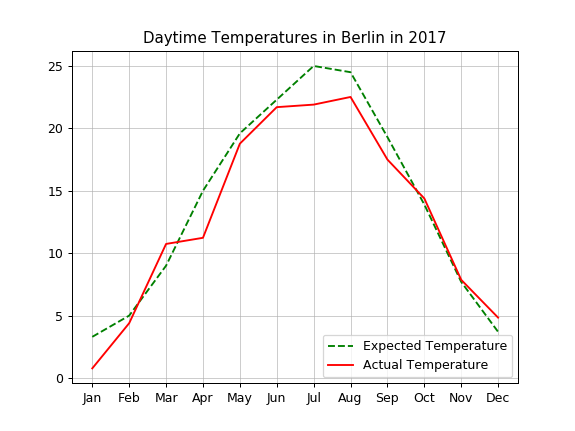

In [119]:
x_values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure()
plt.plot(list(w.index), list(w.values), "--", color="green")
plt.plot(list(hist_mean.index), list(hist_mean.values), "-", color="red")

In [ ]:
# Yes - the actual temperatures were below expected for entire summer.

In [126]:
ax = plt.gca()
ax.grid(linewidth=0.5)
#If you skip the step below it will display only 6 out of 12 month names. Dont know why?
# To Fix : 1st - setxticks 2nd - setxticklabels
ax.set_xticks(list(w.index))
ax.set_xticklabels(x_values);

plt.legend(['Expected Temperature', 'Actual Temperature'], loc=4)
plt.title("Daytime Temperatures in Berlin in 2017")

In [152]:
hist_mean.rename(columns={'temp_clean' : 'Actual_Temperature'}, inplace=True)
hist_mean.Actual_Temperature = hist_mean.Actual_Temperature.round(1)
hist_mean['Expected_Temperature'] = w.values

In [153]:
hist_mean.index = x_values

In [155]:
hist_mean['difference'] = hist_mean.Actual_Temperature - hist_mean.Expected_Temperature

In [156]:
hist_mean

,Actual_Temperature,Expected_Temperature,difference
Jan,0.8,3.3,-2.5
Feb,4.4,5,-0.6
Mar,10.7,9,1.7
Apr,11.2,15,-3.8
May,18.8,19.6,-0.8
Jun,21.7,22.3,-0.6
Jul,21.9,25,-3.1
Aug,22.5,24.5,-2
Sep,17.5,19.3,-1.8
Oct,14.4,13.9,0.5
